In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":12,
    "n_white_vehicle":2,
    "n_white_drone":1},
    "init":"SE"
  },

  "blacks":{
    "params":{
    "n_black_infantry":12,
    "n_black_vehicle":2,
    "n_black_drone":1},
    "init":"NW"
  }
}

In [3]:
from plato.objective.spatial.capture_objective import CaptureObjective
objectives = [CaptureObjective({'xy':[20,70],'radius':7})]

In [4]:
sim = Environment(config, shape=(100,100), objectives=objectives)

In [5]:
obs = sim.reset()

In [6]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

SHELLDRAKE    <plato.entity.infantry.Infantry object at 0x11c090b90>
ANAHEIM       <plato.entity.infantry.Infantry object at 0x11c090ed0>
NEEDLES       <plato.entity.infantry.Infantry object at 0x11c097950>
LONDON        <plato.entity.infantry.Infantry object at 0x11c099450>
CHARLIE       <plato.entity.infantry.Infantry object at 0x11c099f10>
LEYTEGULF     <plato.entity.infantry.Infantry object at 0x11c085790>
AURORA        <plato.entity.infantry.Infantry object at 0x1107f1d90>
EUREKA        <plato.entity.infantry.Infantry object at 0x11c09cf50>
HONOLULU      <plato.entity.infantry.Infantry object at 0x11c09ea50>
MILWAUKEE     <plato.entity.infantry.Infantry object at 0x11c09f550>
BRAVO         <plato.entity.infantry.Infantry object at 0x11c0a1b50>
QUEBEC        <plato.entity.infantry.Infantry object at 0x11c0a1b90>
INDEPENDENCE  <plato.entity.vehicle.Vehicle object at 0x11c0a1b10>
BOUGANSVILLE  <plato.entity.vehicle.Vehicle object at 0x11bfa7050>
BUFFALO       <plato.entity.drone.Dron

In [7]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x11c0a0150>
unknown_1     <plato.entity.infantry.Infantry object at 0x11c0a0190>
unknown_2     <plato.entity.infantry.Infantry object at 0x11c0a0c50>
unknown_3     <plato.entity.infantry.Infantry object at 0x11c0ac750>
unknown_4     <plato.entity.infantry.Infantry object at 0x11c0ad250>
unknown_5     <plato.entity.infantry.Infantry object at 0x11c0add10>
unknown_6     <plato.entity.infantry.Infantry object at 0x11c0af810>
unknown_7     <plato.entity.infantry.Infantry object at 0x11c0b1310>
unknown_8     <plato.entity.infantry.Infantry object at 0x11c0b1dd0>
unknown_9     <plato.entity.infantry.Infantry object at 0x11c0b48d0>
unknown_10    <plato.entity.infantry.Infantry object at 0x11c0b5ed0>
unknown_11    <plato.entity.infantry.Infantry object at 0x11c0b5f10>
unknown_12    <plato.entity.vehicle.Vehicle object at 0x11c0b5e90>
unknown_13    <plato.entity.vehicle.Vehicle object at 0x11c0b53d0>
unknown_14    <plato.entity.drone.Dron

In [8]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 100, 100)

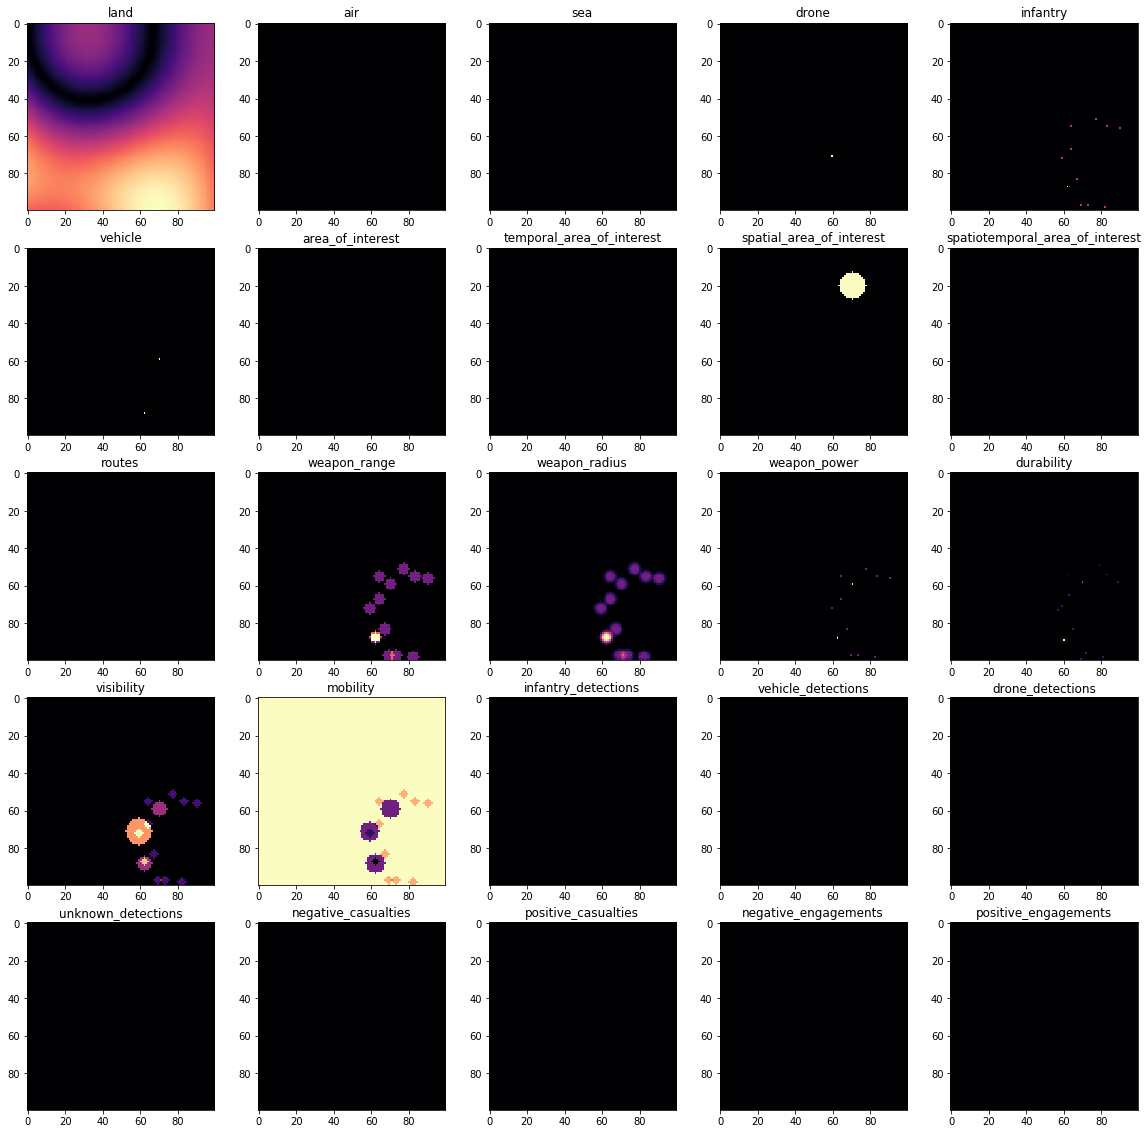

In [9]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

In [11]:
import tqdm
sim.reset()
bar = tqdm.tqdm_notebook(total=sim.time_limit)

terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metadata = sim.step(whites, blacks)
    state = sprime
    bar.update(1)
    
    if sim.timer % 1024 == 0: sim.render()
           
print('Black Kills:')
for ent in metadata['positive_casualties']: print('\t',ent.id,ent)
print('White Kills:')
for ent in metadata['negative_casualties']: print('\t',ent.id,ent)

print('\nReward:', reward)

Black Kills:
White Kills:

Reward: 1
